<a href="https://colab.research.google.com/github/toche7/fuzzyMICMAC/blob/main/FuzzyMICMAC_R2_WithLAtexGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Correct Some Bug

import csv
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Mounted at /content/drive


from numpy.matrixlib.defmatrix import matrix

def text_to_number(text):
    return float(text)

def change_diagonal(matrix,change_to,size):
    matrix_dummy = np.copy(matrix)
    for i in range(0,size):
        for j in range(0,size):
            if i==j:
                matrix_dummy[i][j] = change_to
    return matrix_dummy

def mat_mult_max(matrix_mult,matrix_mult_2):
    result = [ [ 0 for i in range(size) ] for j in range(size) ]
    # iterate through rows of X
    for i in range(0,size):
        for j in range(0,size):
            num_arr = []
            for k in range(0,size):
                num_arr.append(float(min(float(matrix_mult[i][k]),float(matrix_mult_2[k][j]))))
            result[i][j] = max(num_arr)
    return result

# openning data file
# change the file name
# f = open('COAL_FUZZY2.csv', "r")
# f = open('./sample_data/food.csv', "r")

## Taweesak Drive
#f = open('/content/drive/MyDrive/MU/PhDDesertation/PAT/MICMAC-Programe8-11-2021/Fuzzy/agri-FoodSupplyChain/food.csv', "r")
#f = open('/content/drive/MyDrive/MU/PhDDesertation/PAT/MICMAC-Programe8-11-2021/Fuzzy/Coal/coal_R1.csv', "r")
#f = open('/content/drive/MyDrive/MU/PhDDesertation/PAT/MICMAC-Programe8-11-2021/Fuzzy/BeefSupplyChain/beef.csv', "r")
#f = open('/content/drive/MyDrive/MU/PhDDesertation/PAT/MICMAC-Programe8-11-2021/Fuzzy/PAT/CannabisFuzzy.csv', "r")
f = open('/content/drive/MyDrive/Colab Notebooks/ResearchPetai/khan3.csv', "r")

## Petai Drive
#f = open('/content/drive/MyDrive/Flipped Classroom RV/Fuzzy/agri-FoodSupplyChain/food.csv', "r")
#f = open('/content/drive/MyDrive/Flipped Classroom RV/Fuzzy/Coal/coal_R1.csv', "r")
#f = open('/content/drive/MyDrive/Flipped Classroom RV/Fuzzy/BeefSupplyChain/beef.csv', "r")
#f = open('/content/drive/MyDrive/Flipped Classroom RV/Fuzzy /Petai/KHAN2.csv', "r")


data = f.read()


# convert csv string to array
lines = data.splitlines()
reader = csv.reader(lines)
matrix_ = list(reader)
matrix_[0][0] = '0'

#print(matrix_)
size = len(matrix_[0])

for i in range(0,size):
    for j in range(0,size):
        if matrix_[i][j] != '0':
            matrix_[i][j] = text_to_number(matrix_[i][j])
        else:
            matrix_[i][j] = float(0)
        if i == j:
            matrix_[i][j] = 1


#matrix_before = np.copy(matrix_)

result = change_diagonal(matrix_,0,size) # Start from 0 orthogonal matrix
matrix_ = np.copy(result) # Start from 0 orthogonal matrix, Comment this line to start with 1 orthogonal matrix
result_old = []
print(np.array(matrix_))
i = 0
num_sum = []
while (~np.array_equal(result,result_old))  and (i<20):
    #result_old = np.copy(result)
    result_old = result
    result = mat_mult_max(matrix_,result_old)
    i += 1
    num_sum.append(np.sum(result_old))
    #print(np.array(result))
    #print("Iterations: " + str(i))

print("logic:", np.array_equal(result,result_old))

print("##########################################")
#matrix_data_zero_diag = change_diagonal(result.copy(),0,size)
result_data = np.array(result)
np.savetxt("result.csv", result_data, delimiter=",")
print(result_data)
print("Iterations: " + str(i))
print("##########################################")


Mounted at /content/drive
[[0.    0.7   0.867 0.5   0.    0.333 0.5   0.133 0.    0.5  ]
 [0.333 0.    0.    0.    0.    0.867 0.5   0.333 0.    0.5  ]
 [0.    0.    0.    0.    0.    0.333 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.5   0.133 0.    0.133 0.    0.   ]
 [0.    0.    0.    0.5   0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.133 0.5   0.   ]
 [0.    0.    0.    0.333 0.    0.5   0.    0.    0.133 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.333 0.    0.5   0.    0.    0.    0.   ]
 [0.    0.    0.7   0.    0.    0.5   0.5   0.    0.133 0.   ]]
logic: False
##########################################
[[0.    0.333 0.333 0.5   0.333 0.5   0.333 0.133 0.5   0.333]
 [0.333 0.    0.333 0.333 0.333 0.5   0.333 0.333 0.5   0.333]
 [0.    0.    0.    0.333 0.133 0.333 0.    0.133 0.133 0.   ]
 [0.    0.    0.    0.133 0.5   0.133 0.    0.133 0.133 0.   ]
 [0.    0.    0.    0.5   0.133 0.1

In [ ]:
x_result = np.sum(result_data, axis=0)
y_result = np.sum(result_data, axis=1)
print("x:", x_result)
print("y:", y_result)

x: [0.333 0.333 0.666 2.931 2.364 3.232 0.666 1.397 2.665 0.666]
y: [3.298 3.331 1.065 1.032 1.032 1.232 1.232 0.    1.232 1.799]


In [ ]:
2%2

0

In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

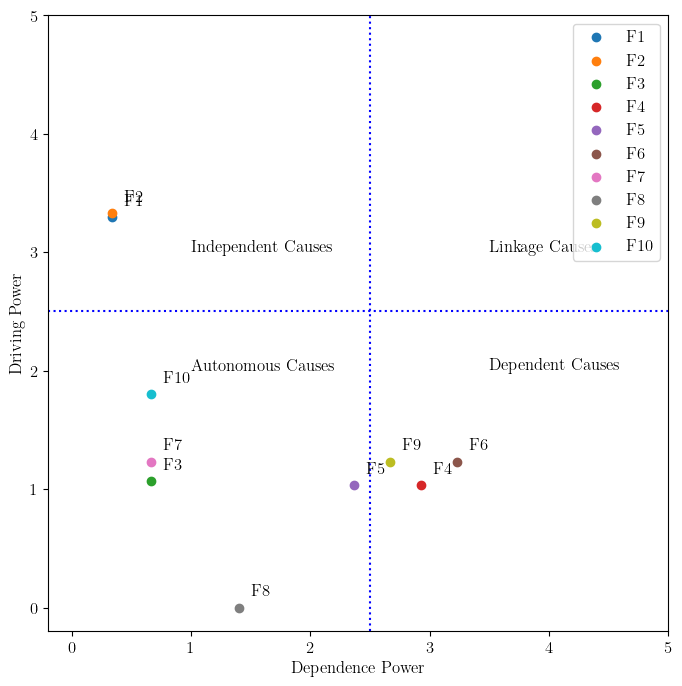

In [ ]:
datatest =  np.array(result)
maxvalue = datatest.max()*datatest.shape[1]
maxvalue

import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

lstNumber = ['F'+str(i) for i in range(1, datatest.shape[1]+1) ]

for i in range(len(x_result)):
    plt.scatter(x_result[i],y_result[i], label = lstNumber[i])
plt.legend(loc ="best", bbox_to_anchor=(1, 1))
plt.xlabel("Dependence Power")
plt.ylabel("Driving Power")
plt.axis([-0.2,maxvalue, -0.2,maxvalue])
#plt.grid(True)
plt.axhline(y= maxvalue/2, color='b', linestyle=':')
plt.axvline(x= maxvalue/2, color='b', linestyle=':')

Qname = [ 'Independent Causes','Linkage Causes','Autonomous Causes','Dependent Causes' ]
position = [( maxvalue*0.20,  maxvalue*0.6 ),(maxvalue*0.70,  maxvalue*0.6 ),(maxvalue*0.20, maxvalue*0.4 ),(maxvalue*0.70, maxvalue*0.4 )]
for i, txt in enumerate(Qname):
    plt.annotate(txt, position[i])

for i, txt in enumerate(lstNumber):
    plt.annotate(txt, (x_result[i] + 0.1, y_result[i]+0.1))


#plt.savefig('DependDrive.eps', format='eps') # uncomment this save a file for paper with LATEX

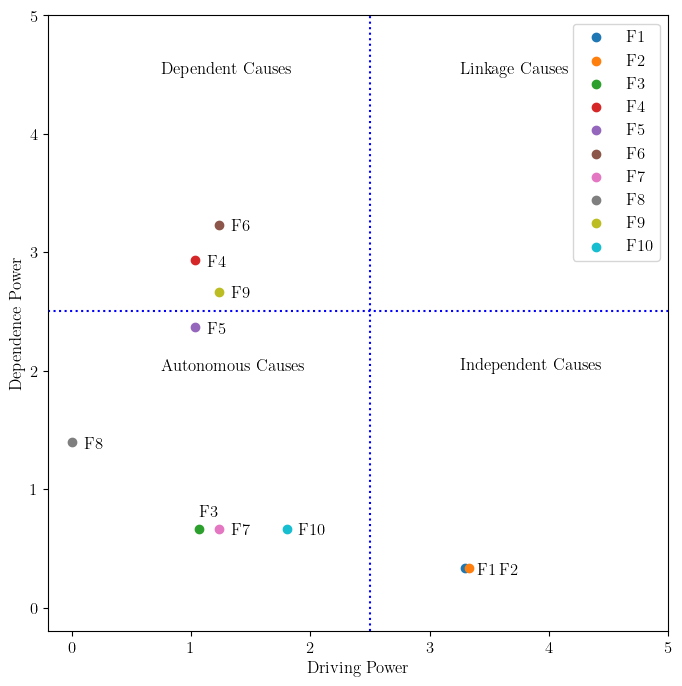

In [ ]:


f = plt.figure()

f.set_figwidth(8)
f.set_figheight(8)
for i in range(len(x_result)):
    plt.scatter(y_result[i],x_result[i], label = lstNumber[i])
plt.legend(loc ="best", bbox_to_anchor=(1, 1))
plt.ylabel("Dependence Power")
plt.xlabel("Driving Power")
plt.axis([-0.2,maxvalue, -0.2,maxvalue])
#plt.grid(True)
plt.axhline(y= maxvalue/2, color='b', linestyle=':')
plt.axvline(x= maxvalue/2, color='b', linestyle=':')

Qname = ['Dependent Causes', 'Linkage Causes', 'Autonomous Causes', 'Independent Causes']
position = [( maxvalue*0.150,  maxvalue*0.9 ),(maxvalue*0.65,  maxvalue*0.9 ),(maxvalue*0.150, maxvalue*0.4 ),(maxvalue*0.65, maxvalue*0.4 )]
for i, txt in enumerate(Qname):
    plt.annotate(txt, position[i])

for i, txt in enumerate(lstNumber):
    if i == 1:
        plt.annotate(txt, (y_result[i]+0.25, x_result[i]- 0.05))
    elif i == 2:
        plt.annotate(txt, (y_result[i], x_result[i]+ 0.1))
    else:
        plt.annotate(txt, (y_result[i] + 0.1, x_result[i] - 0.05))

plt.savefig('DriveDepend.pdf', format='pdf') # uncomment this save a file for paper with LATEX


In [ ]:
print(np.array(num_sum))

[11.93  13.792 14.523 14.854 15.12  15.253 15.253 15.253 15.253 15.253
 15.253 15.253 15.253 15.253 15.253 15.253 15.253 15.253 15.253 15.253]


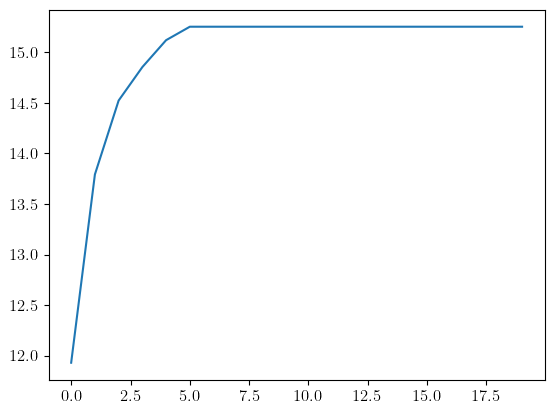

In [ ]:
import matplotlib.pyplot as plt
plt.plot(num_sum)